In [1]:
"""
Author: Sushant Kumar Seet, IIT Madras
"""

'\nAuthor: Sushant Kumar Seet, IIT Madras\n'

In [5]:
import numpy as np
import  matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
class Neural_Network(object):
    
    #initialization
    def __init__(self, W1, W2, W3, b1, b2, b3, activationtype, losstype, weight_update_rule, learning_rate):
        
        #Activation
        self.activationtype = activationtype
        
        #Loss
        self.losstype = losstype
        
        #Weight update rule
        self.weight_update_rule = weight_update_rule
        
        #Learning Rate
        self.learning_rate = learning_rate
        
        #Parameters
        self.inputsize = 32
        self.hidden2size = 150
        self.hidden1size = 150
        self.outputsize = 6
        
        #Weights
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2 
        self.b2 = b2
        self.W3 = W3
        self.b3 = b3
        
        #Ada_grad and RMS_prop Stuff
        #r_w(m)
        self.W1_cache = np.zeros((self.inputsize,self.hidden1size))
        self.b1_cache = np.zeros((1,self.hidden1size))
        self.W2_cache = np.zeros((self.hidden1size, self.hidden2size))
        self.b2_cache = np.zeros((1,self.hidden2size))
        self.W3_cache = np.zeros((self.hidden2size, self.outputsize))
        self.b3_cache = np.zeros((1,self.outputsize))
        
        #Adam Stuff
        self.W1_s = np.zeros((self.inputsize,self.hidden1size))
        self.b1_s = np.zeros((1,self.hidden1size))
        self.W2_s = np.zeros((self.hidden1size, self.hidden2size))
        self.b2_s = np.zeros((1,self.hidden2size))
        self.W3_s = np.zeros((self.hidden2size, self.outputsize))
        self.b3_s = np.zeros((1,self.outputsize))
        
        self.W1_r = np.zeros((self.inputsize,self.hidden1size))
        self.b1_r = np.zeros((1,self.hidden1size))
        self.W2_r = np.zeros((self.hidden1size, self.hidden2size))
        self.b2_r = np.zeros((1,self.hidden2size))
        self.W3_r = np.zeros((self.hidden2size, self.outputsize))
        self.b3_r = np.zeros((1,self.outputsize))
        
        self.t = 1
        
        
    ################################## Activations and their derivatives ##############################
    
    def activation(self,z):
    
        if self.activationtype == "Logistic":
            beta = 1
            return 1/(1+np.exp(-(beta*z)))

        if self.activationtype == "Tanh":
            return np.tanh(z)

        if self.activationtype == "ReLU":
            for i in range(0, len(z)):
                for k in range(0, len(z[i])):
                    if z[i][k] > 0:
                        pass
                    else:
                        z[i][k] = 0
            return z
    
    def activation_derivative(self,a):

        if self.activationtype == "Logistic":
            return np.multiply(a, (1.0 - a))

        if self.activationtype == "Tanh":
            return 1.0 - a**2 

        if self.activationtype == "ReLU":
            for i in range(0, len(a)):
                for k in range(0, len(a[i])):
                    if a[i][k] > 0:
                        a[i][k] = 1.0
                    else:
                        a[i][k] = 0
            return a
    #####################################################################################################
    
    def Logistic(self, z):    
        beta = 1
        return 1/(1+np.exp(-(beta*z)))
        
    def Logistic_derivative(self, a):
        return np.multiply(a, (1.0 - a))
    ######################################################################################################
    ################################# Loss Functions and their derivatives ################################
    
    def Loss_function(self,y,y_hat):
        
        if self.losstype == "SSE":
            loss = (1/2)*(np.square(y-y_hat).mean(axis = 0))
            return np.sum(loss, axis = 0)
        
        if self.losstype == "Cross_entropy":
            minval = 1e-12
            m = y.shape[0]
            loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
            return loss
            
        
    
    def Loss_function_derivative(self,y,y_hat):
        
        if self.losstype == "SSE":
            return (y_hat-y)
        
        if self.losstype == "Cross_entropy":
            return (y_hat-y)
    
    #################################################################################
    ################################ Forward propagation ###########################
    def Forward_prop(self, X):
        
        self.a0 = X
        z1 = self.a0.dot(self.W1) + self.b1
        self.a1 = self.activation(z1)
        z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = self.activation(z2)
        z3 = self.a2.dot(self.W3) + self.b3
        self.a3 = self.Logistic(z3)

        return self.a3
        
    def predict(self, X):                  
        y_hat = self.Forward_prop(X)
        y_hat = np.where(y_hat>0.5,1,0)
        return y_hat
    
    ###################################################################################
    #################################### Backward propagation #########################
    def Backward_prop(self, y):
        
        if self.weight_update_rule == "Delta_rule":
            m = y.shape[0]

            #Calculate Gradients
            dz3 = np.multiply(self.Loss_function_derivative(y,self.a3),self.Logistic_derivative(self.a3))
            self.delta_W3 = 1/m*(self.a2.T).dot(dz3)
            self.delta_b3 = 1/m*np.sum(dz3, axis=0)

            dz2 = np.multiply(dz3.dot(self.W3.T) ,self.activation_derivative(self.a2))
            self.delta_W2 = 1/m*np.dot(self.a1.T, dz2)
            self.delta_b2 = 1/m*np.sum(dz2, axis=0)

            dz1 = np.multiply(dz2.dot(self.W2.T),self.activation_derivative(self.a1))
            self.delta_W1 = 1/m*np.dot(self.a0.T,dz1)
            self.delta_b1 = 1/m*np.sum(dz1,axis=0)

            #Update weights and bias
            self.W1 -= self.learning_rate * self.delta_W1
            self.b1 -= self.learning_rate * self.delta_b1
            self.W2 -= self.learning_rate * self.delta_W2
            self.b2 -= self.learning_rate * self.delta_b2
            self.W3 -= self.learning_rate * self.delta_W3
            self.b3 -= self.learning_rate * self.delta_b3
        
        if self.weight_update_rule == "Generalized_delta":
            m = y.shape[0]
            alpha = 0.1

            #Calculate Gradients
            dz3 = np.multiply(self.Loss_function_derivative(y,self.a3),self.Logistic_derivative(self.a3))
            self.delta_W3 = 1/m*(self.a2.T).dot(dz3)
            self.delta_b3 = 1/m*np.sum(dz3, axis=0)

            dz2 = np.multiply(dz3.dot(self.W3.T) ,self.activation_derivative(self.a2))
            self.delta_W2 = 1/m*np.dot(self.a1.T, dz2)
            self.delta_b2 = 1/m*np.sum(dz2, axis=0)

            dz1 = np.multiply(dz2.dot(self.W2.T),self.activation_derivative(self.a1))
            self.delta_W1 = 1/m*np.dot(self.a0.T,dz1)
            self.delta_b1 = 1/m*np.sum(dz1,axis=0)
            
            #Update weights and bias
            self.W1 -= self.learning_rate * (self.delta_W1 + alpha * self.W1_cache)
            self.b1 -= self.learning_rate * (self.delta_b1 + alpha * self.b1_cache)
            self.W2 -= self.learning_rate * (self.delta_W2 + alpha * self.W2_cache)
            self.b2 -= self.learning_rate * (self.delta_b2 + alpha * self.b2_cache)
            self.W3 -= self.learning_rate * (self.delta_W3 + alpha * self.W3_cache)
            self.b3 -= self.learning_rate * (self.delta_b3 + alpha * self.b3_cache)
            
            #Update cache
            self.W1_cache = self.delta_W1
            self.b1_cache = self.delta_b1
            self.W2_cache = self.delta_W2
            self.b2_cache = self.delta_b2
            self.W3_cache = self.delta_W3
            self.b3_cache = self.delta_b3
            
        
            
        if self.weight_update_rule == "Ada_grad":
            
            m = y.shape[0]
            eps = 1e-8

            #Calculate Gradients
            dz3 = np.multiply(self.Loss_function_derivative(y,self.a3),self.Logistic_derivative(self.a3))
            self.delta_W3 = 1/m*(self.a2.T).dot(dz3)
            self.delta_b3 = 1/m*np.sum(dz3, axis=0)

            dz2 = np.multiply(dz3.dot(self.W3.T) ,self.activation_derivative(self.a2))
            self.delta_W2 = 1/m*np.dot(self.a1.T, dz2)
            self.delta_b2 = 1/m*np.sum(dz2, axis=0)

            dz1 = np.multiply(dz2.dot(self.W2.T),self.activation_derivative(self.a1))
            self.delta_W1 = 1/m*np.dot(self.a0.T,dz1)
            self.delta_b1 = 1/m*np.sum(dz1,axis=0)
            
            #Update cache
            self.W1_cache += (self.delta_W1)**2
            self.b1_cache += (self.delta_b1)**2
            self.W2_cache += (self.delta_W2)**2
            self.b2_cache += (self.delta_b2)**2
            self.W3_cache += (self.delta_W3)**2
            self.b3_cache += (self.delta_b3)**2
            
                     
            #Update weights and bias
            self.W1 -= (self.learning_rate * self.delta_W1)/(np.sqrt(self.W1_cache) + eps)
            self.b1 -= (self.learning_rate * self.delta_b1)/(np.sqrt(self.b1_cache) + eps)
            self.W2 -= (self.learning_rate * self.delta_W2)/(np.sqrt(self.W2_cache) + eps)
            self.b2 -= (self.learning_rate * self.delta_b2)/(np.sqrt(self.b2_cache) + eps)
            self.W3 -= (self.learning_rate * self.delta_W3)/(np.sqrt(self.W3_cache) + eps)
            self.b3 -= (self.learning_rate * self.delta_b3)/(np.sqrt(self.b3_cache) + eps)
            
        if self.weight_update_rule == "RMS_prop":
            
            m = y.shape[0]
            eps = 1e-8
            rho = 0.9

            #Calculate Gradients
            dz3 = np.multiply(self.Loss_function_derivative(y,self.a3),self.Logistic_derivative(self.a3))
            self.delta_W3 = 1/m*(self.a2.T).dot(dz3)
            self.delta_b3 = 1/m*np.sum(dz3, axis=0)

            dz2 = np.multiply(dz3.dot(self.W3.T) ,self.activation_derivative(self.a2))
            self.delta_W2 = 1/m*np.dot(self.a1.T, dz2)
            self.delta_b2 = 1/m*np.sum(dz2, axis=0)

            dz1 = np.multiply(dz2.dot(self.W2.T),self.activation_derivative(self.a1))
            self.delta_W1 = 1/m*np.dot(self.a0.T,dz1)
            self.delta_b1 = 1/m*np.sum(dz1,axis=0)
            
            #Update cache
            self.W1_cache = rho*self.W1_cache + (1 - rho)*((self.delta_W1)**2)
            self.b1_cache = rho*self.b1_cache + (1 - rho)*((self.delta_b1)**2)
            self.W2_cache = rho*self.W2_cache + (1 - rho)*((self.delta_W2)**2)
            self.b2_cache = rho*self.b2_cache + (1 - rho)*((self.delta_b2)**2)
            self.W3_cache = rho*self.W3_cache + (1 - rho)*((self.delta_W3)**2)
            self.b3_cache = rho*self.b3_cache + (1 - rho)*((self.delta_b3)**2)
            
            #Update weights and bias
            self.W1 -= (self.learning_rate * self.delta_W1)/(np.sqrt(self.W1_cache) + eps)
            self.b1 -= (self.learning_rate * self.delta_b1)/(np.sqrt(self.b1_cache) + eps)
            self.W2 -= (self.learning_rate * self.delta_W2)/(np.sqrt(self.W2_cache) + eps)
            self.b2 -= (self.learning_rate * self.delta_b2)/(np.sqrt(self.b2_cache) + eps)
            self.W3 -= (self.learning_rate * self.delta_W3)/(np.sqrt(self.W3_cache) + eps)
            self.b3 -= (self.learning_rate * self.delta_b3)/(np.sqrt(self.b3_cache) + eps)
            
        if self.weight_update_rule == "Adam":
            
            m = y.shape[0]
            eps = 1e-8
            rho1 = 0.9
            rho2 = 0.999
            
            #Calculate Gradients
            dz3 = np.multiply(self.Loss_function_derivative(y,self.a3),self.Logistic_derivative(self.a3))
            self.delta_W3 = 1/m*(self.a2.T).dot(dz3)
            self.delta_b3 = 1/m*np.sum(dz3, axis=0)

            dz2 = np.multiply(dz3.dot(self.W3.T) ,self.activation_derivative(self.a2))
            self.delta_W2 = 1/m*np.dot(self.a1.T, dz2)
            self.delta_b2 = 1/m*np.sum(dz2, axis=0)

            dz1 = np.multiply(dz2.dot(self.W2.T),self.activation_derivative(self.a1))
            self.delta_W1 = 1/m*np.dot(self.a0.T,dz1)
            self.delta_b1 = 1/m*np.sum(dz1,axis=0)
            
            
            self.W1_s = rho1*self.W1_s + (1-rho1)*self.delta_W1
            self.b1_s = rho1*self.b1_s + (1-rho1)*self.delta_b1
            self.W2_s = rho1*self.W2_s + (1-rho1)*self.delta_W2
            self.b2_s = rho1*self.b2_s + (1-rho1)*self.delta_b2
            self.W3_s = rho1*self.W3_s + (1-rho1)*self.delta_W3
            self.b3_s = rho1*self.b3_s + (1-rho1)*self.delta_b3

            self.W1_r = rho2*self.W1_r + (1-rho2)*((self.delta_W1)**2)
            self.b1_r = rho2*self.b1_r + (1-rho2)*((self.delta_b1)**2)
            self.W2_r = rho2*self.W2_r + (1-rho2)*((self.delta_W2)**2)
            self.b2_r = rho2*self.b2_r + (1-rho2)*((self.delta_b2)**2)
            self.W3_r = rho2*self.W3_r + (1-rho2)*((self.delta_W3)**2)
            self.b3_r = rho2*self.b3_r + (1-rho2)*((self.delta_b3)**2)
            
            W1_s_hat = (self.W1_s)/(1-np.power(rho1,self.t))
            b1_s_hat = (self.b1_s)/(1-np.power(rho1,self.t))
            W2_s_hat = (self.W2_s)/(1-np.power(rho1,self.t))
            b2_s_hat = (self.b2_s)/(1-np.power(rho1,self.t))
            W3_s_hat = (self.W3_s)/(1-np.power(rho1,self.t))
            b3_s_hat = (self.b3_s)/(1-np.power(rho1,self.t))

            W1_r_hat = (self.W1_r)/(1-np.power(rho2,self.t))
            b1_r_hat = (self.b1_r)/(1-np.power(rho2,self.t))
            W2_r_hat = (self.W2_r)/(1-np.power(rho2,self.t))
            b2_r_hat = (self.b2_r)/(1-np.power(rho2,self.t))
            W3_r_hat = (self.W3_r)/(1-np.power(rho2,self.t))
            b3_r_hat = (self.b3_r)/(1-np.power(rho2,self.t))
            
            self.t = self.t + 1
            
            #Update weights and bias
            self.W1 -= (self.learning_rate * W1_s_hat)/(np.sqrt(np.where(W1_r_hat<0, 0, W1_r_hat)) + eps)
            self.b1 -= (self.learning_rate * b1_s_hat)/(np.sqrt(np.where(b1_r_hat<0, 0, b1_r_hat)) + eps)
            self.W2 -= (self.learning_rate * W2_s_hat)/(np.sqrt(np.where(W2_r_hat<0, 0, W2_r_hat)) + eps)
            self.b2 -= (self.learning_rate * b2_s_hat)/(np.sqrt(np.where(b2_r_hat<0, 0, b2_r_hat)) + eps)
            self.W3 -= (self.learning_rate * W3_s_hat)/(np.sqrt(np.where(W3_r_hat<0, 0, W3_r_hat)) + eps)
            self.b3 -= (self.learning_rate * b3_s_hat)/(np.sqrt(np.where(b3_r_hat<0, 0, b3_r_hat)) + eps)       
            
        
    ########################################################################################
    
    ################################# Train Neural Network ##################################
    
    def Train(self, mode, X_train, y_train, X_test,y_test, max_epoch):
        
        if mode == "Pattern":
            m = len(X_train)
            n = len(X_test)
            self.loss_train = []
            self.loss_test = []
            self.epoch = []
            epoch_count = 0
            while epoch_count < max_epoch:
                
                epoch_count = epoch_count + 1
                self.epoch.append(epoch_count)
                error_train = [] 
                error_test = [] 
                
                for i in range(n):
                                      
                    y_hat_test = self.Forward_prop(X_test[i].reshape(1,self.inputsize))
                    l_test = self.Loss_function(y_test[i].reshape(1,self.outputsize),y_hat_test)
                    
                    error_test.append(l_test.copy())
                er = np.mean(error_test)    
                self.loss_test.append(er)
                
                for i in range(m):
                                      
                    y_hat_train = self.Forward_prop(X_train[i].reshape(1,self.inputsize))
                    l = self.Loss_function(y_train[i].reshape(1,self.outputsize),y_hat_train)
                    self.Backward_prop(y_train[i].reshape(1,self.outputsize))
                    
                    error_train.append(l.copy())
                er = np.mean(error_train)    
                self.loss_train.append(er)
                
                if epoch_count >2:
                    if np.abs(self.loss_test[epoch_count-2] - self.loss_test[epoch_count -1]) < 1e-7 :
                        number_of_epochs = epoch_count
                        print("Number of epochs for convergence =", number_of_epochs)
                        break
                        
            #plt.plot( self.epoch,self.loss_train)
            #plt.plot( self.epoch,self.loss_test)
            #plt.xlabel("No. of epochs")
            #plt.ylabel("MSE")
            
                    
        if mode == "Batch" :
            m = len(X_train)
            n = len(X_test)
            self.loss_train = []
            self.loss_test = []
            self.epoch = []
            epoch_count = 0
            while epoch_count < max_epoch:
                
                epoch_count = epoch_count + 1
                self.epoch.append(epoch_count)
                
                y_hat_test = self.Forward_prop(X_test.reshape(n,self.inputsize))
                l_test = self.Loss_function(y_test.reshape(n,self.outputsize),y_hat_test)
                self.loss_test.append(l_test.copy())
                
                y_hat_train = self.Forward_prop(X_train.reshape(m,self.inputsize))                   
                l = self.Loss_function(y_train.reshape(m,self.outputsize),y_hat_train) 
                self.loss_train.append(l.copy())
                
                if epoch_count >2:
                    if np.abs(self.loss_test[epoch_count-2] - self.loss_test[epoch_count -1]) < 1e-7 :
                        number_of_epochs = epoch_count
                        print("Number of epochs for convergence =", number_of_epochs)
                        break
                        
                self.Backward_prop(y_train.reshape(m,self.outputsize))
                
                
            plt.plot( self.epoch,self.loss_train)
            plt.plot( self.epoch,self.loss_test)
            plt.xlabel("No. of epochs")
            plt.ylabel("MSE")

In [18]:
def precisition_recall_fscore(y, y_hat):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    precision = precision_score(y, y_hat, average = 'samples')
    recall = recall_score(y, y_hat, average = 'samples')
    fmeasure = 2*(precision*recall)/(precision+recall)
    print("precision = ",precision)
    print("recall = ", recall)
    print("F_measure =",fmeasure)

In [7]:
np.random.seed(0)
path ="F:/Deep Learning/Assignment 1/Multi-label_team_1-6/Multi-label_team_1-6/5/"
X = np.loadtxt(open(path + "X.csv", "rb"), delimiter=",", skiprows=1)
Y = np.loadtxt(open(path + "Y.csv", "rb"), delimiter=",", skiprows=1)

In [8]:
############ min max normalization ######################## 
X = (X - X.min(axis = 0))/(X.max(axis = 0) - X.min(axis = 0))

In [9]:
nx, ny = X.shape
index = np.random.random((nx,)) <= 0.7

X_train = X[index]
y_train = Y[index]

X_test = X[~index]
y_test = Y[~index]

In [10]:
group_5 = ["flowers","sunset","window","buildings","sky","person"]

In [26]:
np.random.seed(1)
var = np.sqrt(2/(182))
W1 = np.random.normal(0, var, (32, 150))
b1 = np.random.normal(0, var, (1, 150 ))

var = np.sqrt(2/(300))
W2 = np.random.normal(0, var, (150, 150))
b2 = np.random.normal(0, var, (1, 150))

var = np.sqrt(2/(156))
W3 = np.random.normal(0, var, (150, 6))
b3 = np.random.normal(0, var, (1, 6 ))

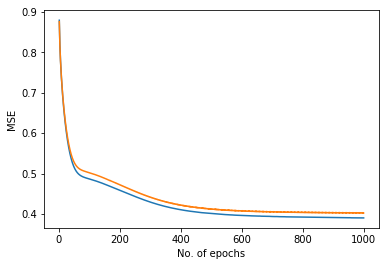

In [16]:
NN = Neural_Network(W1,W2, W3, b1,b2,b3, "Tanh", "SSE", "RMS_prop", 0.0001)
NN.Train("Batch",X_train,y_train,X_test,y_test, 5000)

In [19]:
y_hat = NN.predict(X_train) 
precisition_recall_fscore(y_train,y_hat)

precision =  0.7589878580914438
recall =  0.5935543540125213
F_measure = 0.6661537714405703


C:\Users\Sushant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


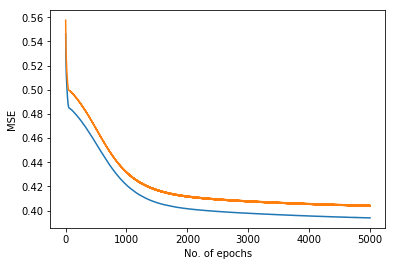

In [28]:
NN1 = Neural_Network(W1,W2, W3, b1,b2,b3, "Logistic", "SSE", "RMS_prop", 0.0001)
NN1.Train("Batch",X_train,y_train,X_test,y_test, 5000)

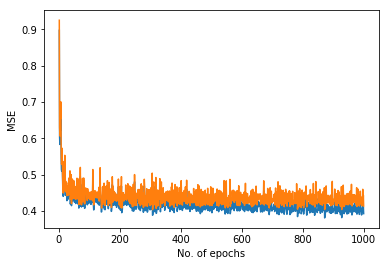

In [89]:
NN_norm_tanh = Neural_Network(W1,W2, W3, b1,b2,b3, "Tanh", "SSE", "RMS_prop", 0.01)
NN_norm_tanh.Train("Batch",X_train,y_train,X_test,y_test, 1000)

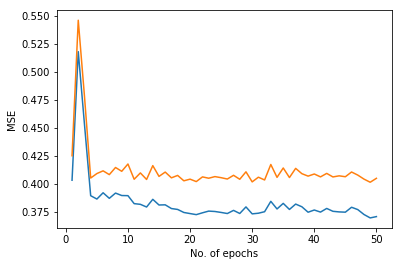

In [92]:
NN_norm_ReLU = Neural_Network(W1,W2, W3, b1,b2,b3, "ReLU", "SSE", "RMS_prop", 0.01)
NN_norm_ReLU.Train("Batch",X_train,y_train,X_test,y_test, 50)

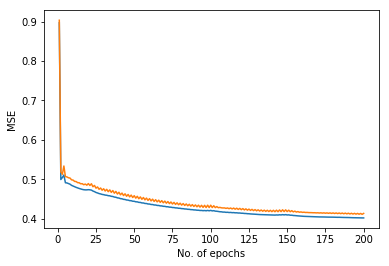

In [147]:
NN3 = Neural_Network(W1,W2, W3, b1,b2,b3, "Tanh", "SSE", "Ada_grad", 0.01)
NN3.Train("Batch",X_train,y_train,X_test,y_test, 200)

In [153]:
y_hat = NN_12.predict(X_train) 
precisition_recall_fscore(y_train,y_hat)

precision =  0.7650232403718459
recall =  0.6047476759628153
F_measure = 0.675508614112497


C:\Users\Sushant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
